In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
import os
from sklearn.impute import SimpleImputer

In [73]:
path = os.getcwd()
print(path)
os.chdir("C:/Users/USER/Downloads")
print(os.getcwd())

C:\Users\USER\Downloads
C:\Users\USER\Downloads


In [74]:
#import Dataset
Crime=pd.read_csv('C:/Users/USER/Downloads/Crime_Data_from_2020_to_Present.csv', sep=',',encoding='latin-1')
Crime.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [75]:
#column names

Crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [76]:
#data shape by row and column

Crime.shape

(862906, 28)

In [77]:
Crime.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.629060e+05,862906.000000,862906.000000,862906.000000,862906.000000,862906.000000,862906.000000,862886.000000,299647.000000,862896.000000,58447.000000,1742.000000,57.000000,862906.000000,862906.000000
mean,1.961506e+08,1345.993386,10.860006,1132.317284,1.419721,501.994537,29.941419,309.283723,365.876218,501.778446,957.486697,981.040184,988.508772,34.026953,-118.190290
std,4.569677e+07,651.250248,6.138097,613.639293,0.493514,209.151447,21.510678,215.650185,121.857935,208.976666,111.831431,62.503758,29.758626,1.271577,4.400756
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-12.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.766800
25%,1.620117e+08,900.000000,6.000000,625.000000,1.000000,330.000000,14.000000,102.000000,400.000000,330.000000,998.000000,998.000000,998.000000,34.010900,-118.430500
50%,2.201122e+08,1425.000000,11.000000,1162.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.059000,-118.320500
75%,2.311107e+08,1900.000000,16.000000,1655.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.166700,-118.273900
max,9.102204e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,99.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.541800,0.000000


In [78]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862906 entries, 0 to 862905
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           862906 non-null  int64  
 1   Date Rptd       862906 non-null  object 
 2   DATE OCC        862906 non-null  object 
 3   TIME OCC        862906 non-null  int64  
 4   AREA            862906 non-null  int64  
 5   AREA NAME       862906 non-null  object 
 6   Rpt Dist No     862906 non-null  int64  
 7   Part 1-2        862906 non-null  int64  
 8   Crm Cd          862906 non-null  int64  
 9   Crm Cd Desc     862906 non-null  object 
 10  Mocodes         749241 non-null  object 
 11  Vict Age        862906 non-null  int64  
 12  Vict Sex        757597 non-null  object 
 13  Vict Descent    757584 non-null  object 
 14  Premis Cd       862886 non-null  float64
 15  Premis Desc     862398 non-null  object 
 16  Weapon Used Cd  299647 non-null  float64
 17  Weapon Des

In [79]:
#check for missing values

Crime.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113665
Vict Age               0
Vict Sex          105309
Vict Descent      105322
Premis Cd             20
Premis Desc          508
Weapon Used Cd    563259
Weapon Desc       563259
Status                 1
Status Desc            0
Crm Cd 1              10
Crm Cd 2          804459
Crm Cd 3          861164
Crm Cd 4          862849
LOCATION               0
Cross Street      727445
LAT                    0
LON                    0
dtype: int64

In [82]:
#check for duplicates

Crime.duplicated().sum()

124959

In [83]:
#drop duplicates

Drop_duplicates = Crime.drop_duplicates()

In [85]:
Drop_duplicates.duplicated().sum()

0

In [90]:
#fill missing values with NAs

Drop["Status"].fillna("NA",inplace = True)
Drop["Mocodes"].fillna("NA",inplace = True)
Drop["Vict Sex"].fillna("NA",inplace = True)
Drop["Premis Desc"].fillna("NA",inplace = True)
Drop["Premis Cd"].fillna("NA",inplace = True)
Drop["Weapon Used Cd"].fillna("NA",inplace = True)
Drop["Weapon Desc"].fillna("NA",inplace = True)
Drop["Weapon Desc"].fillna("NA",inplace = True)
Drop["Weapon Desc"].fillna("NA",inplace = True)
Drop["Weapon Desc"].fillna("NA",inplace = True)
Drop["Crm Cd 4"].fillna("NA",inplace = True)
Drop["Crm Cd 3"].fillna("NA",inplace = True)
Drop["Crm Cd 2"].fillna("NA",inplace = True)
Drop["Crm Cd 1"].fillna("NA",inplace = True)
Drop["Cross Street"].fillna("NA",inplace = True)

In [91]:
Drop.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [98]:
#drop columns not needed in analysis

Drop = Drop.drop(columns=['Crm Cd 1'])

In [99]:
Drop = Drop.drop(columns=['Crm Cd 2'])

In [100]:
Drop = Drop.drop(columns=['Crm Cd 3'])

In [101]:
Drop = Drop.drop(columns=['Crm Cd 4'])

In [102]:
Drop.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'Cross Street',
       'LAT', 'LON'],
      dtype='object')

In [103]:
#convert date dtype to datetime

Drop[["DATE OCC", "Date Rptd"]] = dd[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)


In [105]:
# removing the values ​​below one for the "Vict Age" column
Drop.drop(dd[dd['Vict Age'] < 1].index, axis=0, inplace=True)

In [106]:
#count of area names

Drop["AREA NAME"].value_counts()

AREA NAME
Central        57481
Southwest      48034
Hollywood      44921
77th Street    41346
Southeast      41163
Rampart        40164
West LA        37039
Wilshire       36363
Pacific        36052
Harbor         35175
N Hollywood    34212
Hollenbeck     32073
Newton         32053
Mission        30338
Olympic        29968
Topanga        29449
Northeast      29442
Van Nuys       28612
West Valley    27436
Devonshire     24883
Foothill       21743
Name: count, dtype: int64

In [107]:
Drop["Crm Cd Desc"].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                70530
BATTERY - SIMPLE ASSAULT                        62877
BURGLARY FROM VEHICLE                           51061
BURGLARY                                        47296
THEFT OF IDENTITY                               44152
                                                ...  
FAILURE TO DISPERSE                                 2
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)        2
TRAIN WRECKING                                      1
DISHONEST EMPLOYEE ATTEMPTED THEFT                  1
FIREARMS RESTRAINING ORDER (FIREARMS RO)            1
Name: count, Length: 139, dtype: int64

In [108]:
Drop["Status"].value_counts()

Status
IC    598274
AO     73133
AA     61941
JA      3194
JO      1397
CC         6
NA         1
19         1
Name: count, dtype: int64

In [109]:
Drop["Status Desc"].value_counts()

Status Desc
Invest Cont     598274
Adult Other      73133
Adult Arrest     61941
Juv Arrest        3194
Juv Other         1397
UNK                  8
Name: count, dtype: int64

In [110]:
Drop["LOCATION"].value_counts()

LOCATION
800 N  ALAMEDA                      ST      1578
6TH                          ST             1378
7TH                          ST             1344
7TH                                         1324
10200    SANTA MONICA                 BL    1307
                                            ... 
15500    HUSTON                       ST       1
N  DILLON                       ST             1
500 W  C                            ST         1
1000    CROSBY                       LN        1
3600    COLISEUM                     ST        1
Name: count, Length: 62632, dtype: int64

In [111]:
Drop.groupby(['Weapon Desc'])['DR_NO'].count().reset_index().sort_values(by='DR_NO', ascending=False)

,Weapon Desc,DR_NO
39,NA,481059
63,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",142334
73,UNKNOWN WEAPON/OTHER WEAPON,26631
76,VERBAL THREAT,19617
27,HAND GUN,15318
...,...,...
1,ANTIQUE FIREARM,10
47,RELIC FIREARM,9
38,MARTIAL ARTS WEAPONS,6
28,HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE,2


In [112]:
Drop.groupby(['Vict Sex'])['DR_NO'].count().reset_index().sort_values(by='DR_NO', ascending=False)

,Vict Sex,DR_NO
3,M,312759
1,F,284037
4,NA,87087
5,X,54013
2,H,49
0,-,2


In [113]:
Drop[["AREA NAME","Weapon Desc", "LOCATION"]]

,AREA NAME,Weapon Desc,LOCATION
0,Southwest,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL
1,Central,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST
2,Central,NA,200 E 6TH ST
3,N Hollywood,NA,5400 CORTEEN PL
4,Mission,NA,14400 TITUS ST
...,...,...,...
862895,West LA,NA,2000 S HOLT AV
862897,West LA,NA,10200 SANTA MONICA BL
862903,Central,NA,500 S MAIN ST
862904,Van Nuys,NA,14500 HARTLAND ST


In [114]:
round(Drop["Vict Age"].mean(),0)

30.0

In [117]:
Data = Drop
Data.head(2)

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,NA,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,NA,34.0459,-118.2545


In [120]:
import csv
Data.to_csv("C:/Users/USER/Downloads.csv")

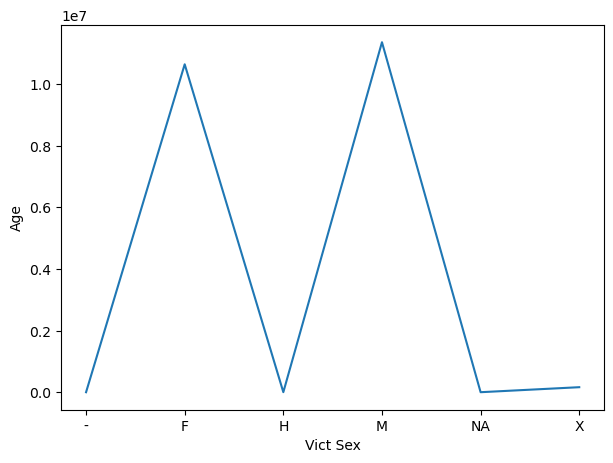

In [67]:
plt.figure(figsize = (7, 5))
dd.groupby(['Vict Sex'])['Vict Age'].sum().plot()
plt.ylabel('Age', size=10)
plt.show()

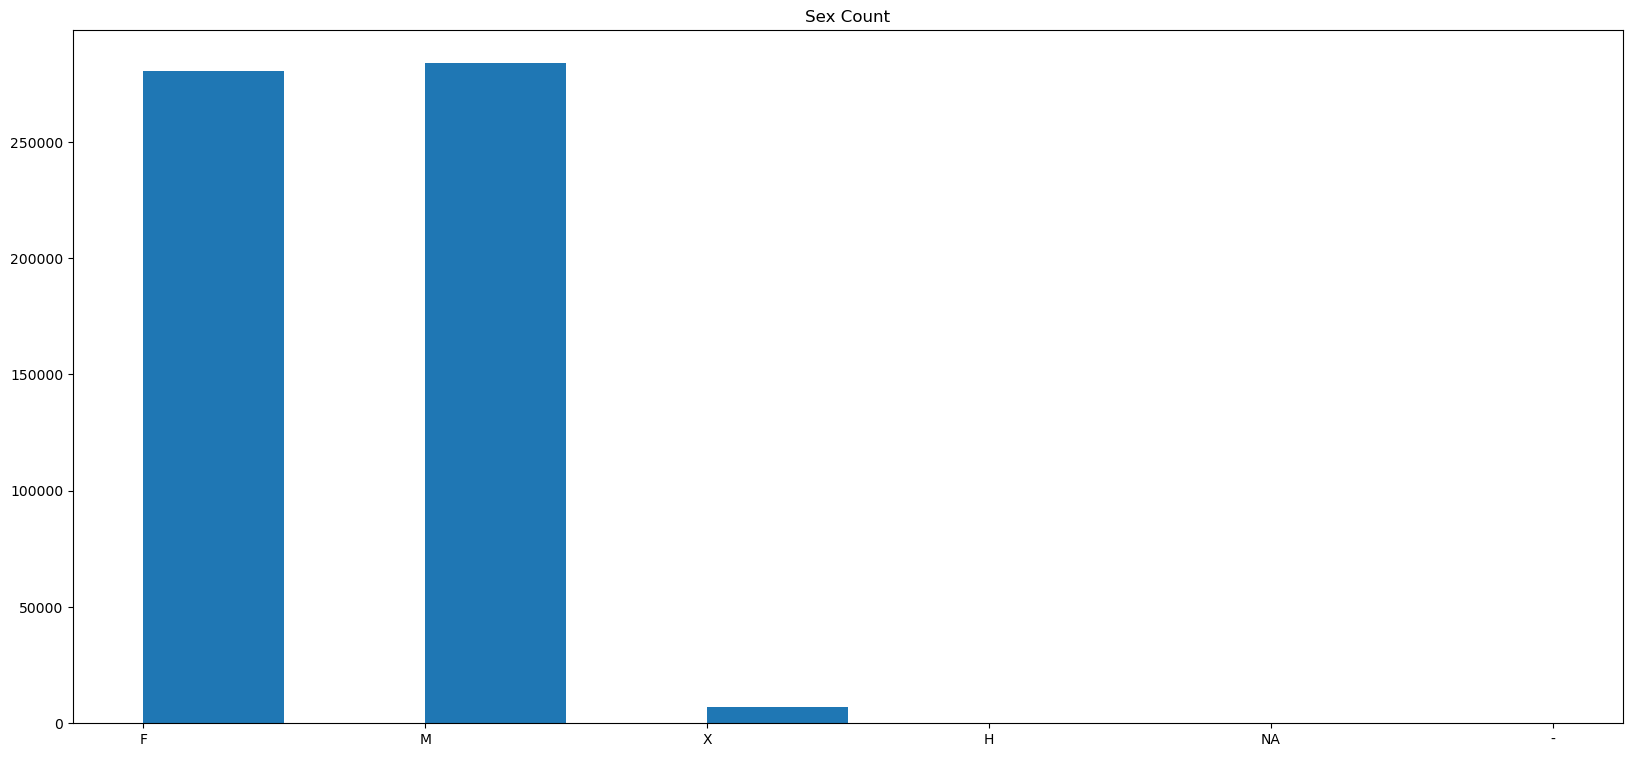

In [68]:
#histogram visuals for products

plt.figure(figsize = (20, 9))
plt.hist(dd['Vict Sex'])
plt.title('Sex Count')
plt.show()

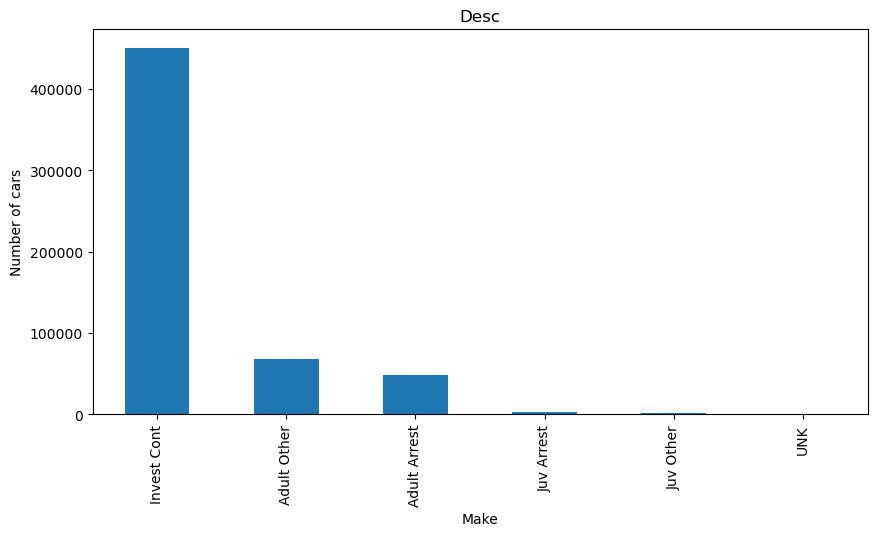

In [69]:
dd["Status Desc"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Desc")
plt.ylabel('Number of cars')
plt.xlabel('Make');

KeyError: 'Low'

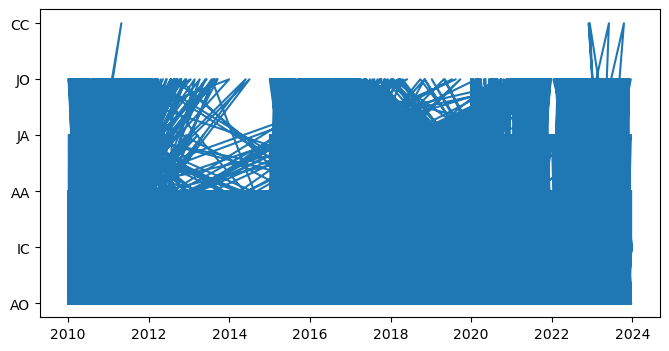

In [71]:
fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)
# Add data items to the chart
ax.plot(dd['Date Rptd'], dd['Status'],label='High')
ax.plot(dd['DATE OCC'], dd['Low'], color=c3, label='Low')

# Add formatting options and titles
ax.set(title='Apple Stock Price', xlabel='Date', ylabel='Price')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [77]:
dd.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')

# clean data...empty rows,incosistencies, time, data, crreate needed columns,delete needed columns,check each column. delete cmds,take awa the time in daterptd and date occ,make time occ time,

In [30]:
df